In [126]:
# manipulação de bases de dados
import pandas as pd

# manipulação algébrica
import numpy as np

# Bibliotecas de EDA
import missingno
from summarytools import dfSummary
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Função para lidar com latitudes e longitudes
from geopy.distance import geodesic

# Trazendo a função para dividir em treino e teste e a função para construir a validação cruzada
from sklearn.model_selection import train_test_split, KFold

# Importando a função de feature importance
from sklearn.inspection import permutation_importance

# Importando os modelos que serão utilizados
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Importando os imputers e o pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Importando a função para tratar variáveis categóricas
from category_encoders import CatBoostEncoder

# Biblioteca para calcular as métricas de regressão
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Biblioteca para tunagem de hiperparâmetros
import optuna as opt

pd.set_option('display.max_columns', None)

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Importando as bases necessárias

orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

In [3]:
# dataframe orders: Quem são as colunas? Quais são os tipos de dados?
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
# dataframe order_items: Quem são as colunas? Quais são os tipos de dados?
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [5]:
# dataframe products: Quem são as colunas? Quais são os tipos de dados?
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [6]:
# dataframe customers: Quem são as colunas? Quais são os tipos de dados?
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
# dataframe reviews: Quem são as colunas? Quais são os tipos de dados?
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [8]:
# dataframe payments: Quem são as colunas? Quais são os tipos de dados?
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
# dataframe sellers: Quem são as colunas? Quais são os tipos de dados?
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [10]:
# dataframe geolocation: Quem são as colunas? Quais são os tipos de dados?
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
# Realizando junções (merge)

df1 = pd.merge(orders, order_items, on='order_id')

df2 = pd.merge(df1, products, on='product_id')

df3 = pd.merge(df2, customers, on='customer_id')

df4 = pd.merge(df3, reviews, on='order_id')

df5 = pd.merge(df4, payments, on='order_id')

df = pd.merge(df5, sellers, on='seller_id')

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77,9350,maua,SP


In [16]:
print(f"A base possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

A base possui 117329 linhas e 39 colunas.


In [18]:
# dataframe df: Quem são as colunas? Quais são os tipos de dados?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [19]:
# Estatísticas descritivas do dataframe

df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,117329.000000,117329.000000,117329.000000,115634.000000,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000
mean,1.194121,120.524349,20.027514,48.768018,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452,35060.118112,4.031467,1.094452,2.940151,172.062565,24450.781955
std,0.684225,182.944843,15.828077,10.033831,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875,29849.496175,1.387927,0.731174,2.775370,265.388194,27582.364358
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000,1.000000,0.000000,0.000000,1001.000000
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,4.000000,1.000000,1.000000,60.750000,6429.000000
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,5.000000,1.000000,2.000000,108.100000,13660.000000
75%,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58770.000000,5.000000,1.000000,4.000000,189.060000,28035.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,5.000000,29.000000,24.000000,13664.080000,99730.000000


In [21]:
# Verificando quantidade de valores nulos por coluna

valores_nulos = df.isnull().sum()
valores_nulos_data_frame = pd.DataFrame({'Nome da Coluna':valores_nulos.index,'Quantidade de valores nulos':valores_nulos.values})
valores_nulos_data_frame

,Nome da Coluna,Quantidade de valores nulos
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,15
5,order_delivered_carrier_date,1235
6,order_delivered_customer_date,2471
7,order_estimated_delivery_date,0
8,order_item_id,0
9,product_id,0


<Axes: >

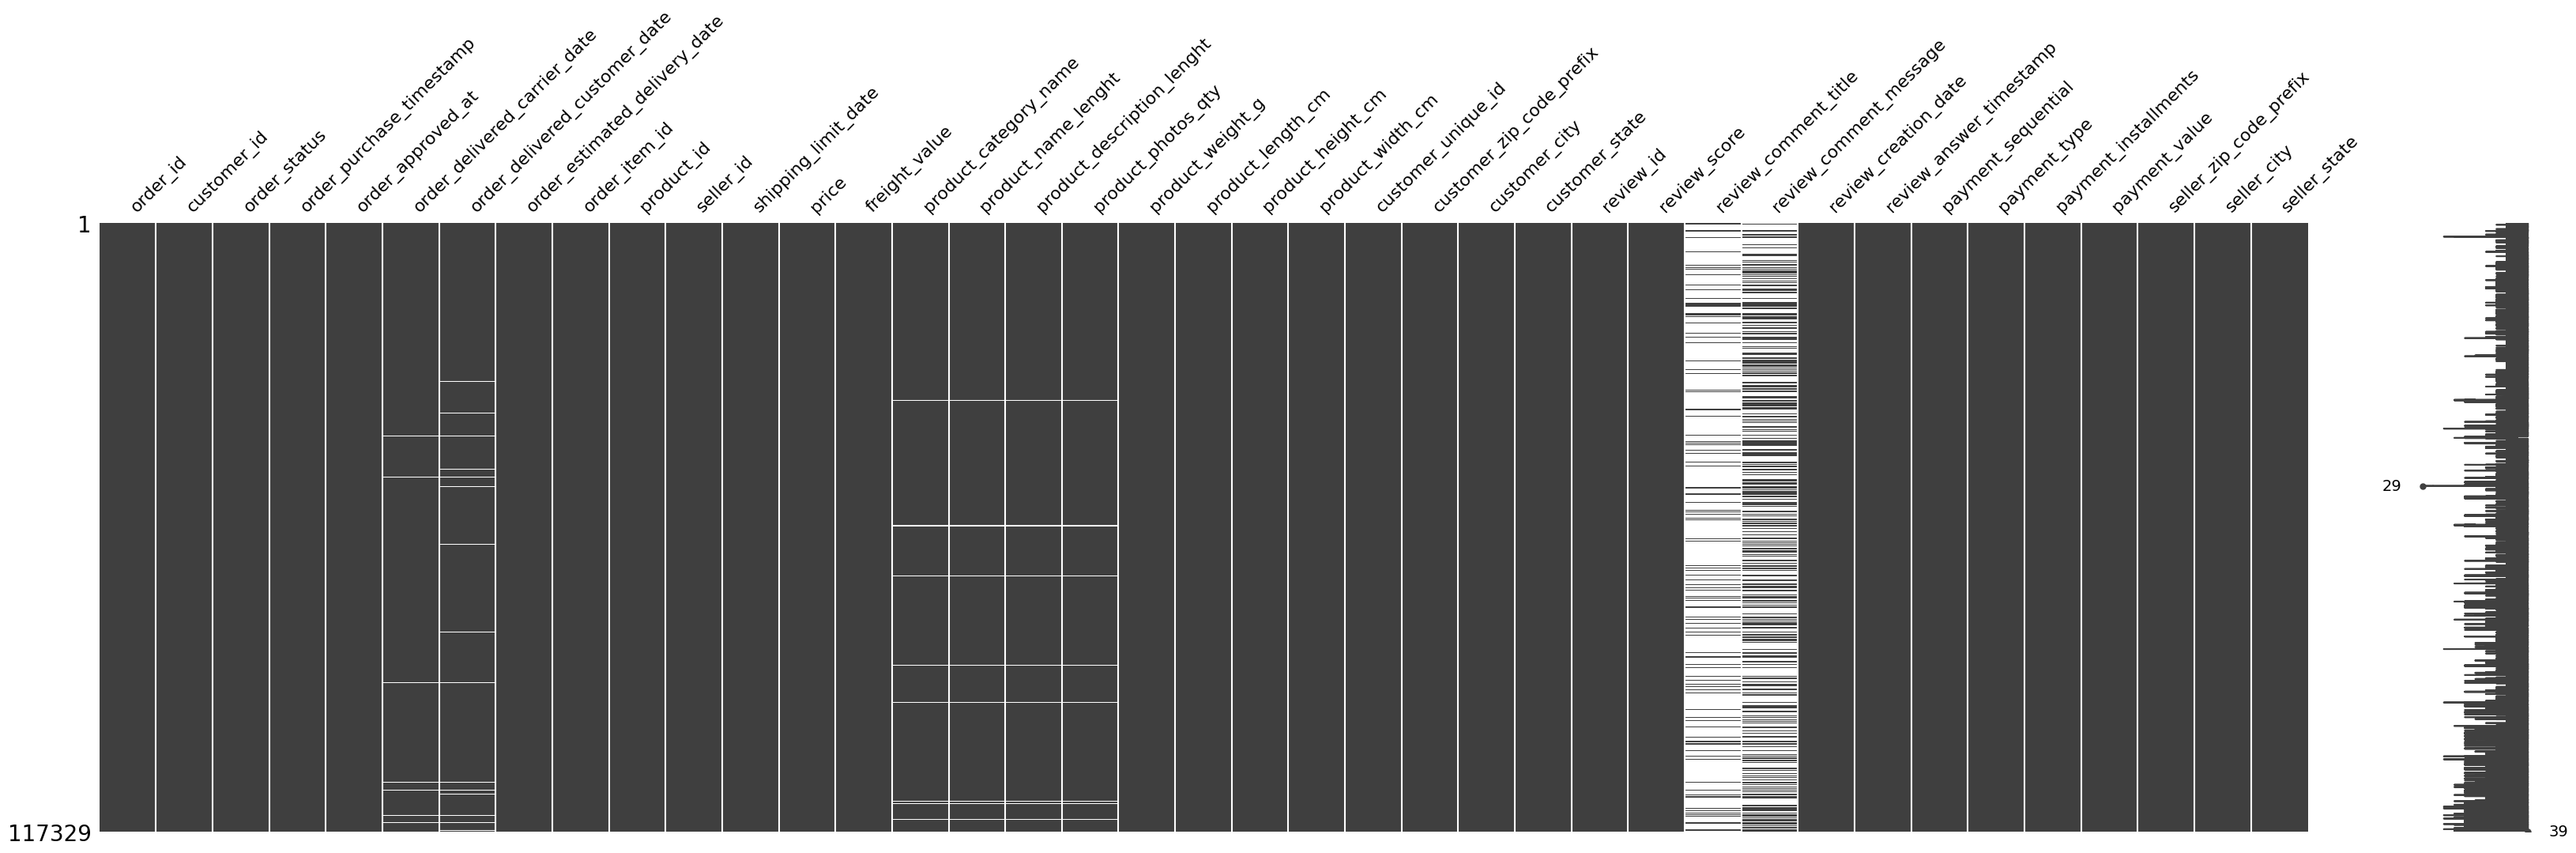

In [24]:
# Maneira mais visual de verificar valores nulos nas diferentes variáveis do dataframe
missingno.matrix(df, figsize=(40,10))

In [27]:
# Percentual de valores nulos

rows, columns = df.shape

percentual_nan = ((df.isnull().sum()/rows)*100).round(2)
percentual_nan

order_id                          0.00
customer_id                       0.00
order_status                      0.00
order_purchase_timestamp          0.00
order_approved_at                 0.01
order_delivered_carrier_date      1.05
order_delivered_customer_date     2.11
order_estimated_delivery_date     0.00
order_item_id                     0.00
product_id                        0.00
seller_id                         0.00
shipping_limit_date               0.00
price                             0.00
freight_value                     0.00
product_category_name             1.44
product_name_lenght               1.44
product_description_lenght        1.44
product_photos_qty                1.44
product_weight_g                  0.02
product_length_cm                 0.02
product_height_cm                 0.02
product_width_cm                  0.02
customer_unique_id                0.00
customer_zip_code_prefix          0.00
customer_city                     0.00
customer_state           

In [28]:
df[df.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state


In [33]:
# Contagem de valores distintos

contagem = pd.DataFrame(columns = ['Variavel', 'Quantidade_valores_distintos'])

for colunas in df.columns:
    dados = pd.DataFrame({'Variavel':[colunas], 'Quantidade_valores_distintos':df[colunas].value_counts().shape[0]})
    contagem = pd.concat([contagem, dados], ignore_index=True)

contagem

,Variavel,Quantidade_valores_distintos
0,order_id,97916
1,customer_id,97916
2,order_status,7
3,order_purchase_timestamp,97370
4,order_approved_at,89533
5,order_delivered_carrier_date,80449
6,order_delivered_customer_date,95021
7,order_estimated_delivery_date,449
8,order_item_id,21
9,product_id,32789


In [35]:
# Apresentando as funcionalidades da função dfSummary()
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,order_id[object],1. 895ab968e7bb0d5659d16cd74cd1652. fedcd9f7ccdc8cba3a18defedd1a553. fa65dad1b0e818e3ccc5cb0e3923134. ccf804e764ed5650cd8759557269dc5. c6492b842ac190db807c15aff21a7d6. 68986e4324f6a21481df4e6e89abcf7. a3725dfe487d359b5be08cac48b64e8. 465c2e1bee4561cb39e0db8c5993aa9. 6d58638e32674bebee793a47ac4cba10. 5a3b1c29a49756e75f1ef513383c0c11. other,"63 (0.1%)38 (0.0%)29 (0.0%)26 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)22 (0.0%)117,031 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,customer_id[object],1. 270c23a11d024a44c896d1894b261a2. 13aa59158da63ba0e93ec6ac2c07aa3. 9af2372a1e49340278e7c1ef8d749f4. 92cd3ec6e2d643d4ebd0e3d6238f695. 6ee2f17e3b6c33d6a9557f280edd296. 86cc80fef09f7f39df4b0dbce48e817. d22f25a9fadfb1abbc2e29395b12398. 63b964e79dee32a3587651701a2b8d9. 2ba91e12e5e4c9f56b82b86d9031d310. be1c4e52bb71e0c54b11a26b8e8d5911. other,"63 (0.1%)38 (0.0%)29 (0.0%)26 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)22 (0.0%)117,031 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
3,order_status[object],1. delivered2. shipped3. canceled4. invoiced5. processing6. unavailable7. approved,"114,859 (97.9%)1,167 (1.0%)553 (0.5%)370 (0.3%)370 (0.3%)7 (0.0%)3 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9t

In [38]:
# Dataframe com a quantidade de pedidos para cada tipo de status do pedido

order_status_counts = df['order_status'].value_counts().reset_index()
order_status_counts.columns=['status_pedido','contagem']

order_status_counts

,status_pedido,contagem
0,delivered,114859
1,shipped,1167
2,canceled,553
3,invoiced,370
4,processing,370
5,unavailable,7
6,approved,3


In [42]:
# Dataframe com a quantidade de pedidos por tipo de pagamento

payment_counts = df['payment_type'].value_counts().reset_index()
payment_counts.columns=['Tipo_pagamento', 'contagem']

payment_counts

,Tipo_pagamento,contagem
0,credit_card,86520
1,boleto,22835
2,voucher,6282
3,debit_card,1692


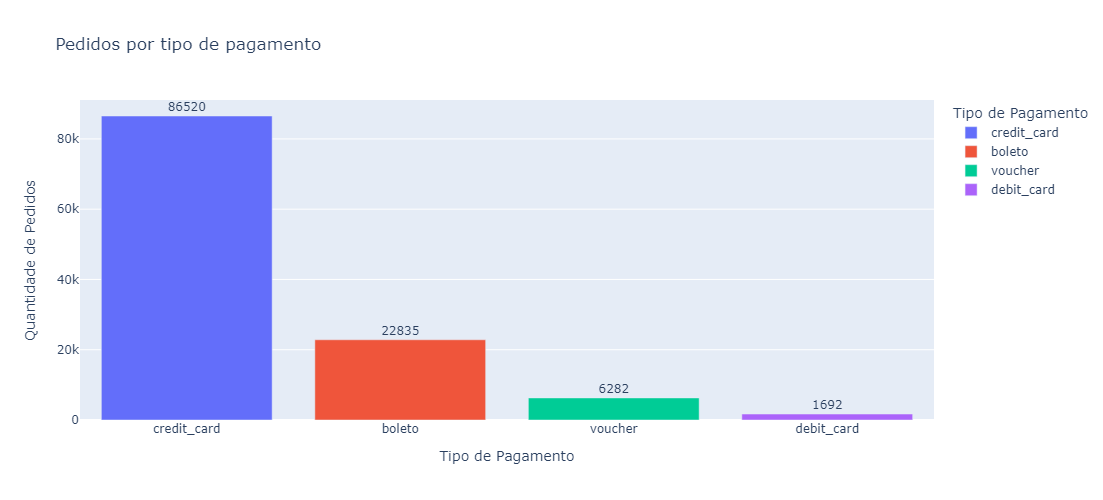

In [45]:
# Gráfico de barras mostrando a quantidade de pedidos por tipo de pagamento

fig = px.bar(payment_counts, x='Tipo_pagamento', y='contagem', color='Tipo_pagamento', text='contagem',
            title='Pedidos por tipo de pagamento', labels={'contagem':'Quantidade de Pedidos', 'Tipo_pagamento':'Tipo de Pagamento'})

fig.update_traces(textposition='outside', texttemplate='%{text}', textfont_size=12)
fig.update_layout(width=1000, height=500)
fig.show()

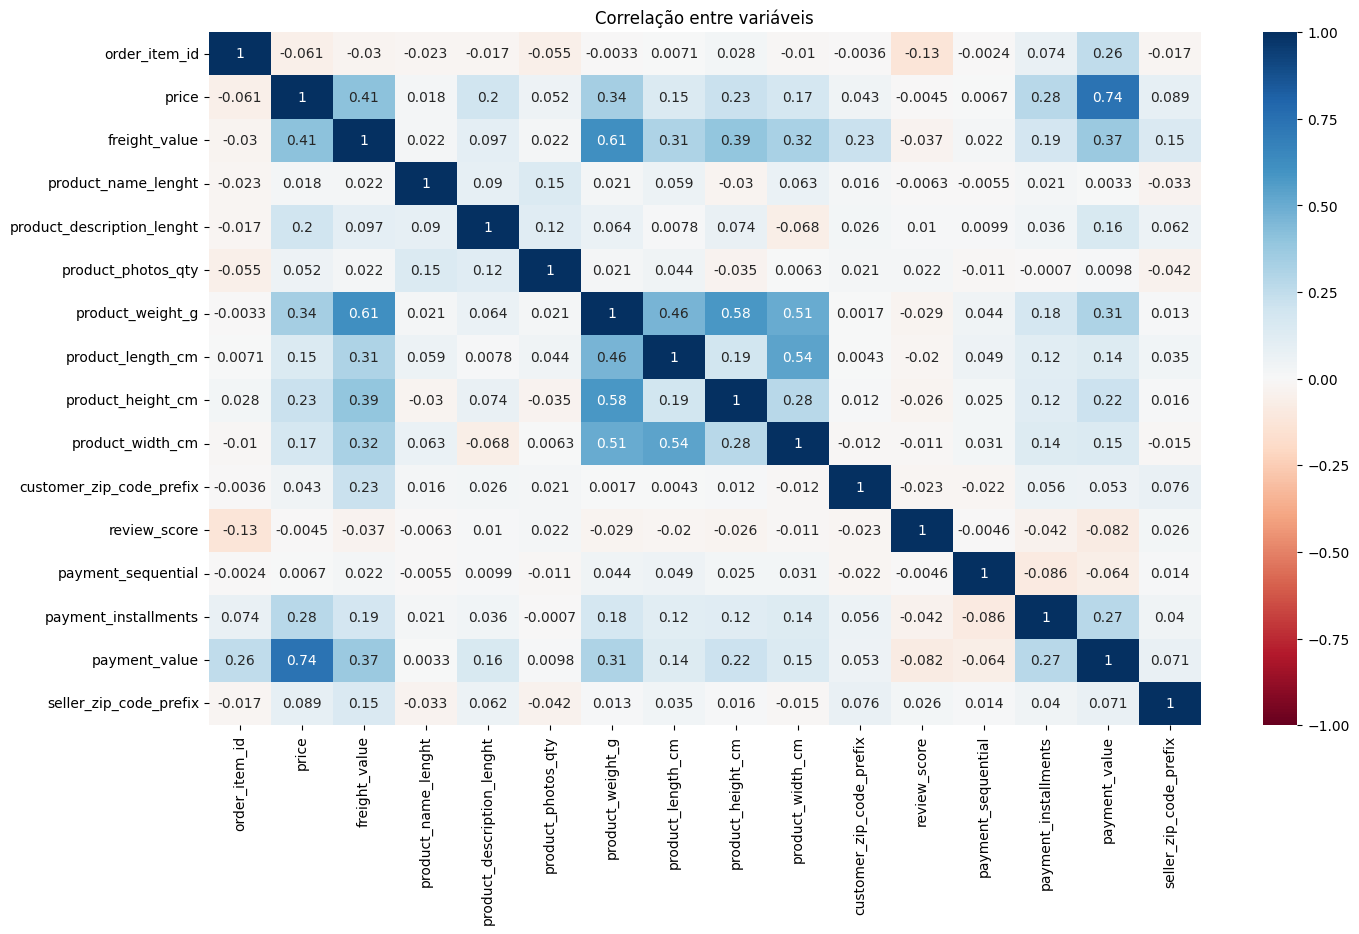

In [47]:
# Heatmap mostrando as correlações entre variáveis numéricas

plt.figure(figsize=(16,9))
plt.title('Correlação entre variáveis')

df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, cmap='RdBu')
plt.show()


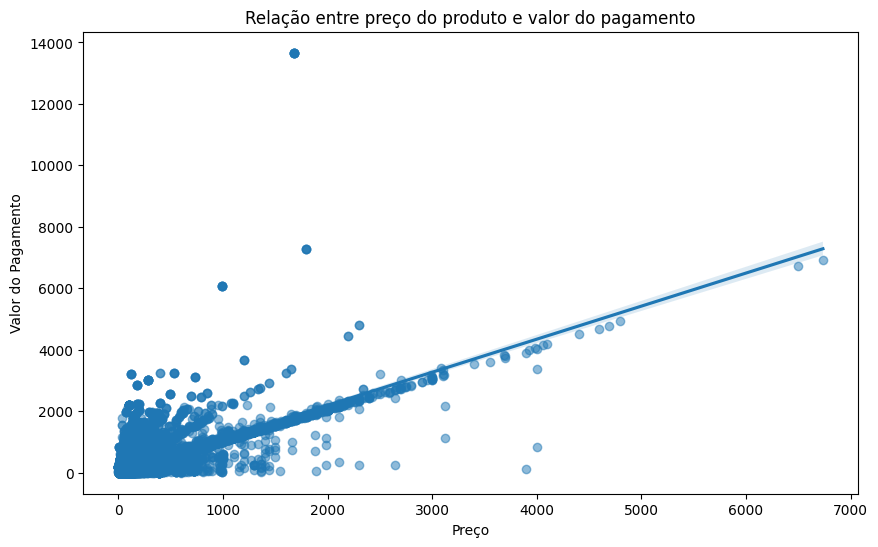

In [49]:
# Gráfico de dispersão entre preço do produto e valor pago pelo cliente

plt.figure(figsize=(10,6))
sns.regplot(x='price', y='payment_value', data=df, scatter_kws={'alpha':0.5})

plt.title('Relação entre preço do produto e valor do pagamento')
plt.xlabel('Preço')
plt.ylabel('Valor do Pagamento')
plt.show()

In [50]:
# analisando resultados que não fazem muito sentido, possível erro operacional/fraude
df[df['payment_value'] > 10000]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
112841,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,3667,sao paulo,SP
112842,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,3667,sao paulo,SP
112843,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,3667,sao paulo,SP
112844,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,3667,sao paulo,SP
112845,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,3667,sao paulo,SP
112846,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entre

([0], [Text(0, 0, '')])

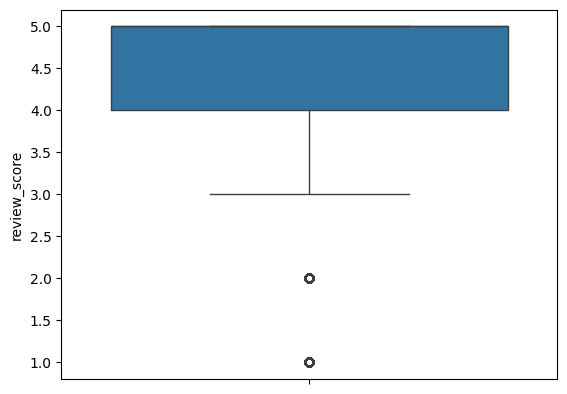

In [51]:
# Análise univariada dos reviews dos clientes

fig=sns.boxplot(y='review_score', data=df)
plt.xticks(rotation=90)

In [52]:
df['review_score'].describe()

count    117329.000000
mean          4.031467
std           1.387927
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

C:\Users\edd-j\AppData\Local\Temp\ipykernel_6036\4179968230.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




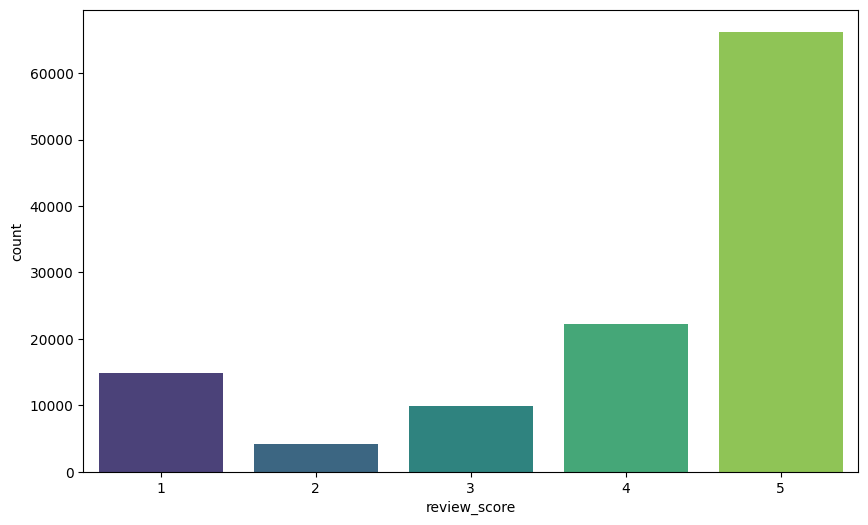

In [53]:
# Countplot da quantidade de pedidos para cada uma das notas de review

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='review_score', palette='viridis')
plt.show()

([0], [Text(0, 0, '')])

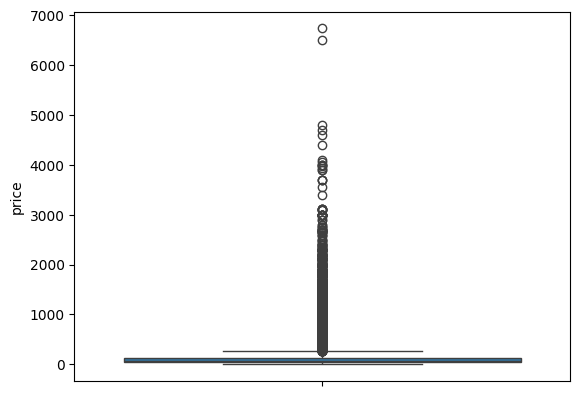

In [54]:
# Análise univariada dos preços dos produtos

fig=sns.boxplot(y='price', data=df)
plt.xticks(rotation=90)

In [55]:
df['price'].describe()

count    117329.000000
mean        120.524349
std         182.944843
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

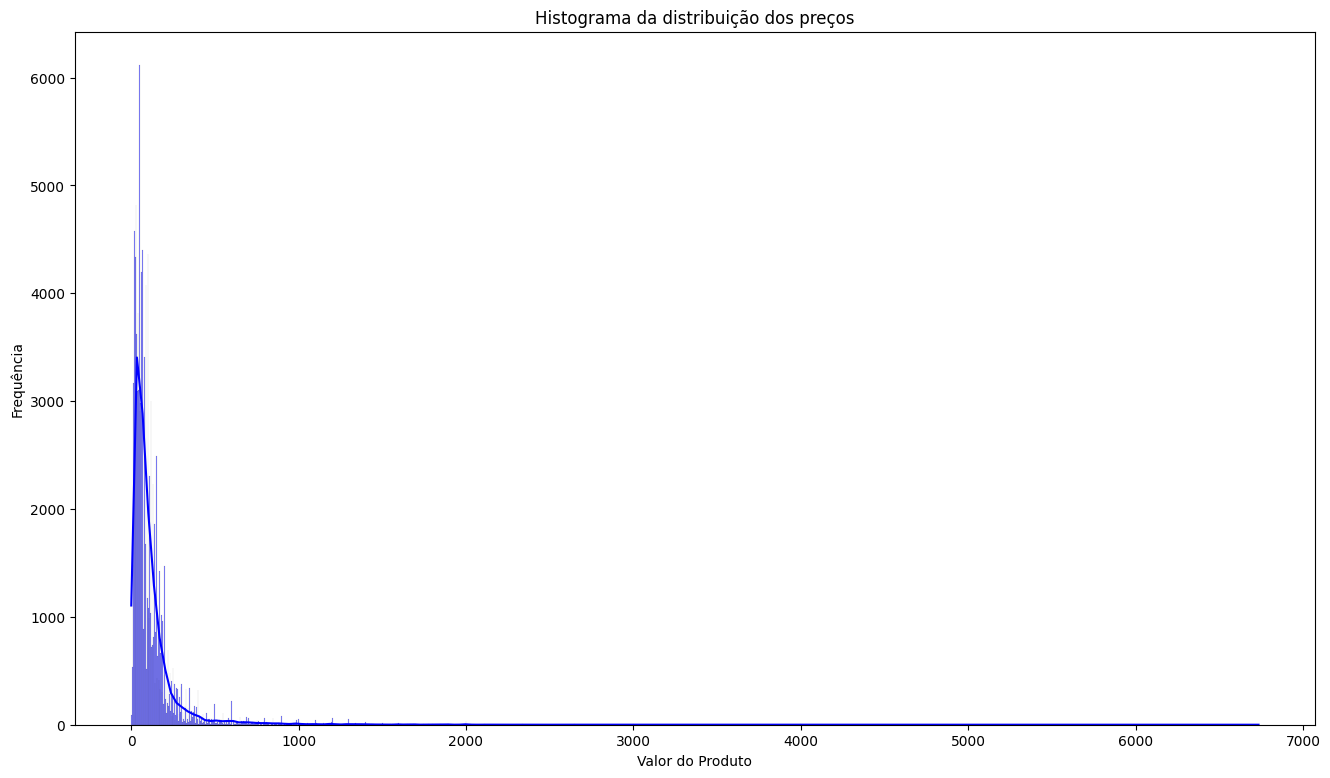

In [56]:
# Histograma da distribuição dos preços dos produtos

plt.figure(figsize=(16,9))
sns.histplot(x='price', data=df, color='blue', kde=True)
plt.title('Histograma da distribuição dos preços')
plt.xlabel('Valor do Produto')
plt.ylabel('Frequência')
plt.show()

([0], [Text(0, 0, '')])

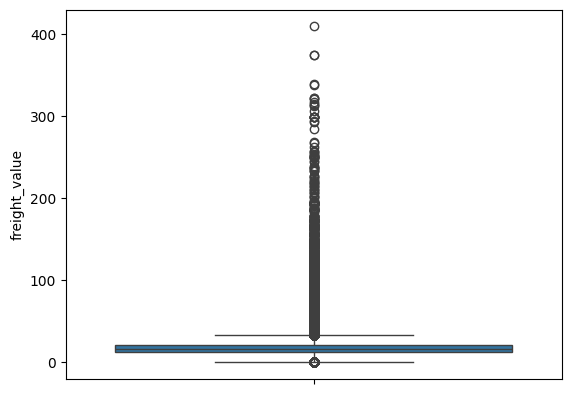

In [57]:
# Análise univariada do valor do frete

fig=sns.boxplot(y='freight_value', data=df)
plt.xticks(rotation=90)

In [58]:
df['freight_value'].describe()

count    117329.000000
mean         20.027514
std          15.828077
min           0.000000
25%          13.080000
50%          16.280000
75%          21.180000
max         409.680000
Name: freight_value, dtype: float64

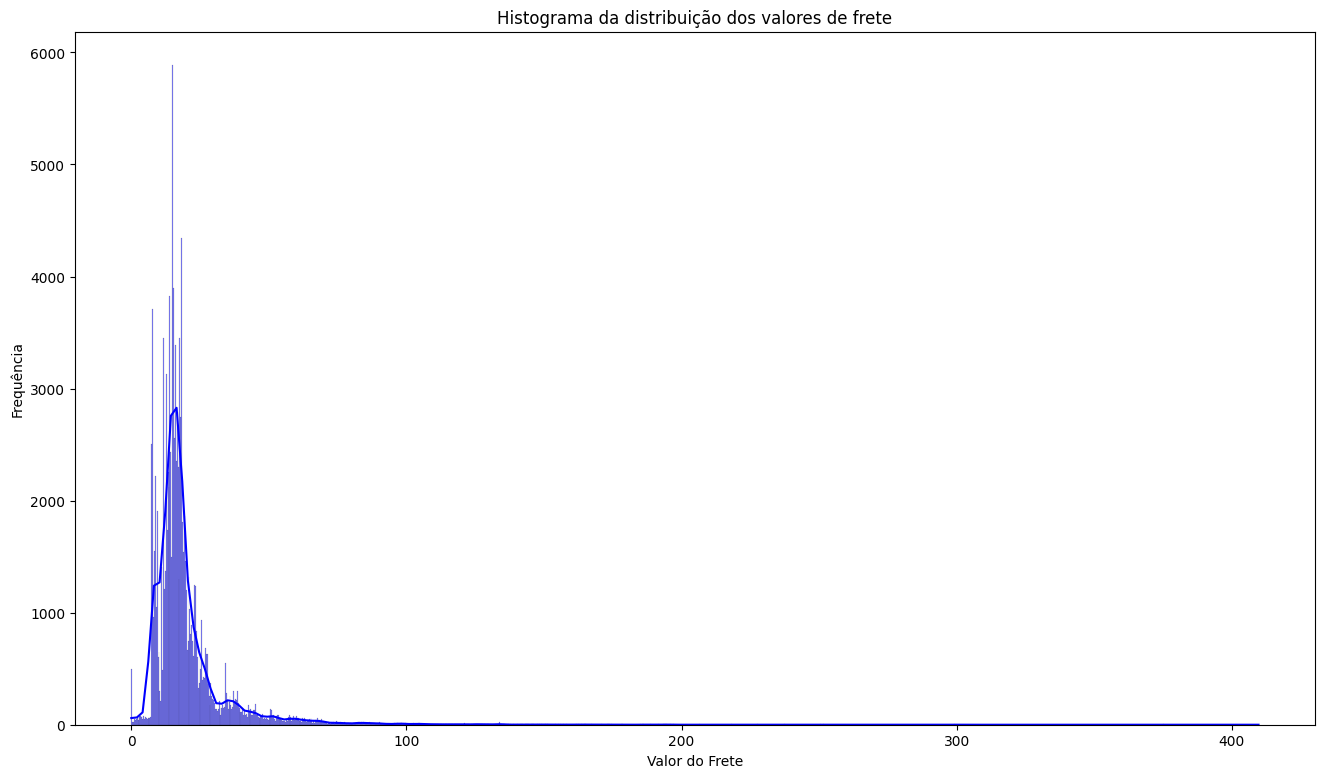

In [59]:
# Histograma da distribuição de valores de frete

plt.figure(figsize=(16,9))
sns.histplot(x='freight_value', data=df, color='blue', kde=True)
plt.title('Histograma da distribuição dos valores de frete')
plt.xlabel('Valor do Frete')
plt.ylabel('Frequência')
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'delivered'),
  Text(1, 0, 'shipped'),
  Text(2, 0, 'canceled'),
  Text(3, 0, 'invoiced'),
  Text(4, 0, 'processing'),
  Text(5, 0, 'unavailable'),
  Text(6, 0, 'approved')])

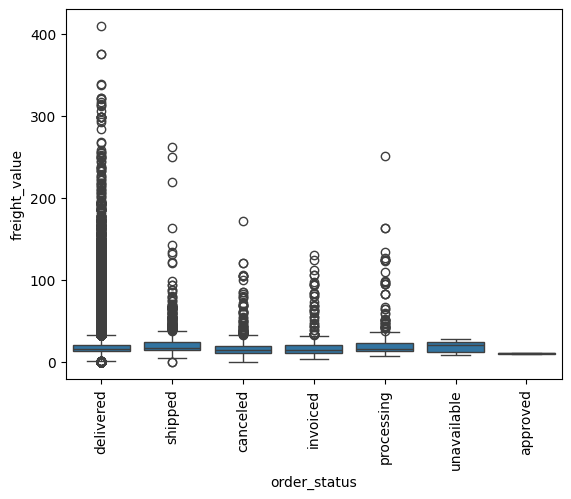

In [60]:
fig=sns.boxplot(x = 'order_status',y='freight_value', data=df)
plt.xticks(rotation=90)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [62]:
# Criando variavel do volume
df['Volume'] = df['product_length_cm']*df['product_height_cm']*df['product_width_cm']

In [64]:
# Criando a variavel da densidade
df['densidade'] = df['product_weight_g']/df['Volume']

In [70]:
# Criando coluna velocidade de entrega

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

df['Velocidade_entrega_real'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['Velocidade_entrega_estimada'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days

In [71]:
# Criação da velocidade de aprovação do pedido
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])

df['velocidade_processamento'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.days

In [72]:
# Quem é a base de geolocation?
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [74]:
# Agregando as longitudes e latitudes pela média

geolocation_agregado = geolocation.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat':'mean','geolocation_lng':'mean'}).reset_index()
geolocation_agregado.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


In [75]:
# Trazendo latitude e longitude dos vendedores
df=pd.merge(df, geolocation_agregado, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,Volume,densidade,Velocidade_entrega_real,Velocidade_entrega_estimada,velocidade_processamento,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,9350,-23.680729,-46.444238
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,9350,-23.680729,-46.444238
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,9350,-23.680729,-46.444238
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77,9350,maua,SP,1976.0,0.253036,2.0,12,0.0,9350,-23.680729,-46.444238
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77,9350,maua,SP,1976.0,0.253036,5.0,12,0.0,9350,-23.680729,-46.444238


In [76]:
# Renomeando e excluindo colunas desnecessárias
df.rename(columns={'geolocation_lat':'seller_lat', 'geolocation_lng':'seller_lng'}, inplace=True)
df.drop(columns='geolocation_zip_code_prefix', inplace=True)

In [77]:
# Trazendo latitude e longitude dos compradores
df=pd.merge(df, geolocation_agregado, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,Volume,densidade,Velocidade_entrega_real,Velocidade_entrega_estimada,velocidade_processamento,seller_lat,seller_lng,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238,3149,-23.576983,-46.587161
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238,3149,-23.576983,-46.587161
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238,3149,-23.576983,-46.587161
3,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,1,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26 00:00:00,2018-03-27 02:21:27,1,credit_card,2,223.38,13405,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,-22.708702,-47.664701,3149,-23.576983,-46.587161
4,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26 00:00:00,2018-03-27 02:21:27,1,credit_card,2,223.38,13405,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,-22.708702,-47.664701,3149,-23.576983,-46.587161


In [78]:
# Renomeando e excluindo colunas desnecessárias
df.rename(columns={'geolocation_lat':'customer_lat', 'geolocation_lng':'customer_lng'}, inplace=True)
df.drop(columns='geolocation_zip_code_prefix', inplace=True)

In [80]:
# Calculando a distância entre vendedor e comprador

def calcular_distancia(dataframe):
    seller_coordenadas = (dataframe['seller_lat'], dataframe['seller_lng'])
    customer_coordenadas = (dataframe['customer_lat'], dataframe['customer_lng'])

    return geodesic(seller_coordenadas, customer_coordenadas).kilometers

df['distancia'] = df.apply(calcular_distancia, axis=1)

In [82]:
df.drop(columns=['seller_lat','seller_lng','customer_lat','customer_lng'], inplace=True)

In [83]:
# Obtendo mês de compra e dia da semana da compra
df['mes_compra'] = df['order_purchase_timestamp'].dt.month

df['dia_semana_compra'] = df['order_purchase_timestamp'].dt.dayofweek

In [85]:
# Trazendo informação da época do ano

df['black_friday'] = ((df['mes_compra'] == 11) & (df['dia_semana_compra'] == 4) & (df['order_purchase_timestamp'].dt.day >= 20) & (df['order_purchase_timestamp'].dt.day <= 30)).astype(int)
df['natal'] = ((df['mes_compra'] == 12) & (df['order_purchase_timestamp'].dt.day >= 1) & (df['order_purchase_timestamp'].dt.day <= 25)).astype(int)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116750 entries, 0 to 116749
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116750 non-null  object        
 1   customer_id                    116750 non-null  object        
 2   order_status                   116750 non-null  object        
 3   order_purchase_timestamp       116750 non-null  datetime64[ns]
 4   order_approved_at              116735 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115525 non-null  object        
 6   order_delivered_customer_date  114296 non-null  datetime64[ns]
 7   order_estimated_delivery_date  116750 non-null  datetime64[ns]
 8   order_item_id                  116750 non-null  int64         
 9   product_id                     116750 non-null  object        
 10  seller_id                      116750 non-null  object        
 11  

In [87]:
# Removendo as colunas desnecessárias
colunas_para_remover = ['order_id', 'customer_id', 'product_id', 'seller_id', 'order_status', 'order_purchase_timestamp',
                       'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                       'order_estimated_delivery_date', 'shipping_limit_date', 'product_description_lenght',
                       'product_name_lenght', 'product_photos_qty', 'customer_unique_id', 'review_id', 'review_comment_title',
                       'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
                       'payment_type', 'payment_installments', 'payment_value', 'seller_zip_code_prefix', 'order_item_id']

df.drop(columns=colunas_para_remover, inplace=True)

df.head()

,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_city,customer_state,review_score,seller_city,seller_state,Volume,densidade,Velocidade_entrega_real,Velocidade_entrega_estimada,velocidade_processamento,distancia,mes_compra,dia_semana_compra,black_friday,natal
0,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,3149,sao paulo,SP,4,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
1,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,3149,sao paulo,SP,4,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
2,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,3149,sao paulo,SP,4,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
3,99.90,11.79,cama_mesa_banho,1050.0,38.0,10.0,38.0,3149,sao paulo,SP,5,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,146.370789,3,3,0,0
4,99.90,11.79,cama_mesa_banho,1050.0,38.0,10.0,38.0,3149,sao paulo,SP,5,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,146.370789,3,3,0,0


In [88]:
df.drop(columns='customer_zip_code_prefix', inplace=True)

In [89]:
df[df.duplicated()]

,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_city,customer_state,review_score,seller_city,seller_state,Volume,densidade,Velocidade_entrega_real,Velocidade_entrega_estimada,velocidade_processamento,distancia,mes_compra,dia_semana_compra,black_friday,natal
1,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,sao paulo,SP,4,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
2,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,sao paulo,SP,4,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
4,99.90,11.79,cama_mesa_banho,1050.0,38.0,10.0,38.0,sao paulo,SP,5,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,146.370789,3,3,0,0
15,34.90,20.84,utilidades_domesticas,3700.0,32.0,22.0,46.0,florianopolis,SC,5,limeira,SP,32384.0,0.114254,8.0,27,0.0,556.788540,10,2,0,0
76,102.90,9.64,tablets_impressao_imagem,450.0,25.0,5.0,20.0,campinas,SP,5,santos,SP,2500.0,0.180000,8.0,10,0.0,136.727155,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116727,159.90,12.14,bebes,2200.0,16.0,35.0,49.0,itapecerica da serra,SP,5,maua,SP,27440.0,0.080175,4.0,9,0.0,41.916880,8,4,0,0
116740,960.00,82.51,moveis_escritorio,50.0,35.0,90.0,45.0,biguacu,SC,1,lajeado,RS,141750.0,0.000353,NaN,28,0.0,389.570993,2,1,0,0
116743,109.90,19.96,bebes,800.0,32.0,11.0,27.0,sao paulo,SP,5,camboriu,SC,9504.0,0.084175,8.0,26,0.0,436.557495,7,1,0,0
116744,109.90,19.96,bebes,800.0,32.0,11.0,27.0,sao paulo,SP,5,camboriu,SC,9504.0,0.084175,8.0,26,0.0,436.557495,7,1,0,0


In [90]:
# Excluindo linhas duplicadas
df = df.drop_duplicates()

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101075 entries, 0 to 116749
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   price                        101075 non-null  float64
 1   freight_value                101075 non-null  float64
 2   product_category_name        99632 non-null   object 
 3   product_weight_g             101059 non-null  float64
 4   product_length_cm            101059 non-null  float64
 5   product_height_cm            101059 non-null  float64
 6   product_width_cm             101059 non-null  float64
 7   customer_city                101075 non-null  object 
 8   customer_state               101075 non-null  object 
 9   review_score                 101075 non-null  int64  
 10  seller_city                  101075 non-null  object 
 11  seller_state                 101075 non-null  object 
 12  Volume                       101059 non-null  float64
 13  dens

# Modelagem

In [92]:
# Dividindo em X e y
X = df.drop(columns='freight_value', axis=1)
y = df.freight_value

In [94]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [100]:
# Modelos instanciados

modelo_XGBoost = XGBRegressor(n_estimators = 1000, max_depth = 8, learning_rate = 1e-3, n_jobs = -1, random_state = 0)
modelo_LightGBM = LGBMRegressor(n_estimators = 1000, max_depth = 8, num_leaves = 2^8, learning_rate = 1e-3, n_jobs = -1, verbose = -1, random_state = 0)
modelo_catboost = CatBoostRegressor(n_estimators = 1000, max_depth = 8, learning_rate = 1e-3, random_state = 0, verbose = 0)
modelo_decision_tree = DecisionTreeRegressor(random_state = 0, max_depth = 8, min_samples_split = 2)

In [104]:
# Aplicando o Feature importance

# Instanciando o catboost encoder para variáveis categóricas
encoder = CatBoostEncoder()

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

for col in X_train_encoded.select_dtypes(include=['object']).columns:

    # Tratando a variável categórica
    X_train_encoded[col] = encoder.fit_transform(X_train_encoded[col], y_train)
    X_test_encoded[col] = encoder.transform(X_test_encoded[col])

# Treinando o modelo
modelo_XGBoost.fit(X_train_encoded, y_train)

r = permutation_importance(modelo_XGBoost, X_test_encoded, y_test, n_repeats = 30, random_state = 0)

In [106]:
# Criando um dataframe para mostrar as importâncias de cada variável
importances = pd.DataFrame({'Feature':X_test_encoded.columns, 'importance':r.importances_mean})

# Ordenando as variáveis pela importância
importances = importances.sort_values(by='importance', ascending=False)
importances

,Feature,importance
11,Volume,2.185925e-01
16,distancia,2.033512e-01
2,product_weight_g,1.780283e-01
0,price,8.756741e-02
7,customer_state,2.853616e-02
9,seller_city,2.165852e-02
3,product_length_cm,1.592028e-02
10,seller_state,1.221011e-02
5,product_width_cm,1.184421e-02
12,densidade,8.239198e-03


In [107]:
# Definindo as colunas menos importantes com base no Feature Importance
colunas_menos_importantes = ['review_score', 'dia_semana_compra', 'natal', 'product_category_name', 'black_friday']

# Excluindo as colunas menos importantes
X_train = X_train.drop(columns = colunas_menos_importantes)
X_test = X_test.drop(columns = colunas_menos_importantes)

In [108]:
# Aplicando o Feature importance

# Instanciando o catboost encoder para variáveis categóricas
encoder = CatBoostEncoder()

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

for col in X_train_encoded.select_dtypes(include=['object']).columns:

    # Tratando a variável categórica
    X_train_encoded[col] = encoder.fit_transform(X_train_encoded[col], y_train)
    X_test_encoded[col] = encoder.transform(X_test_encoded[col])

# Treinando o modelo
modelo_XGBoost.fit(X_train_encoded, y_train)

r_versao_2 = permutation_importance(modelo_XGBoost, X_test_encoded, y_test, n_repeats = 30, random_state = 0)

In [110]:
# Criando um dataframe para mostrar as importâncias de cada variável
importances_2 = pd.DataFrame({'Feature':X_test_encoded.columns, 'importance':r_versao_2.importances_mean})

# Ordenando as variáveis pela importância
importances_2 = importances_2.sort_values(by='importance', ascending=False)
importances_2

,Feature,importance
9,Volume,0.221236
14,distancia,0.205072
1,product_weight_g,0.183147
0,price,0.089023
6,customer_state,0.029337
7,seller_city,0.023364
2,product_length_cm,0.018699
8,seller_state,0.012728
4,product_width_cm,0.010931
10,densidade,0.007392


In [119]:
k = 5

folds = KFold(n_splits = k, shuffle = True, random_state = 42)

# Criando listas para armazenar os valores das métricas em cada fold
erros_absolutos = list()
erros_quadrados = list()
r2 = list()

# Será aplicado o método "split" no objeto folds, que retornará uma lista 
# com os índices das instâncias que pertencem ao conjunto de treino e 
# outra com os índices das instâncias que pertencem ao conjunto de teste

for k, (train_index, test_index) in enumerate(folds.split(X, y)):

    print("#-"*8 + f"Fold: {k+1}" + "-#"*8)

    # Dividindo os dados em treino e teste para cada um dos folds
    X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
    X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]
    # train_index e test_index: São os índices das instâncias do conjunto 
    # de treino e teste, respectivamente, selecionados em cada um dos folds

    # Instanciando o CatBoost Encoder
    encoder = CatBoostEncoder()

    # Criando um imputer para preencher com a moda os valores faltantes de variáveis categóricas
    cat_imputer = SimpleImputer(strategy='most_frequent')

    # Criando um imputer para preencher com a mediana os valores faltantes de variáveis numéricas
    num_imputer = SimpleImputer(strategy='median')

    # Criando pipelines para variáveis categóricas e numéricas que preenche os valores faltantes
    cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
    num_pipeline = Pipeline([('imputer', num_imputer)])

    # Definindo quem são as variáveis categóricas e numéricas
    cat_cols = X_train_interno.select_dtypes(include=['object']).columns
    num_cols = X_train_interno.select_dtypes(exclude=['object']).columns

    # Aplicando os pipelines no conjunto de treinamento para preencher valores faltantes em colunas categóricas e numéricas
    X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
    X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])

    # Aplicando os pipelines ao conjunto de teste para preencher valores faltantes em colunas categóricas e numéricas
    X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
    X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])

    # Treinando o modelo
    modelo_XGBoost.fit(X_train_interno, y_train_interno)

    # Obtendo as previsões do modelo
    y_pred = modelo_XGBoost.predict(X_test_interno)

    # Calculando as métricas para o fold em questão
    r2score = r2_score(y_test_interno, y_pred)
    mse = mean_squared_error(y_test_interno, y_pred)
    mae = mean_absolute_error(y_test_interno, y_pred)

    # Armazenando as métricas nas listas criadas
    erros_absolutos.append(mae)
    erros_quadrados.append(mse)
    r2.append(r2score)

    # Exibindo as métricas para cada um dos folds
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"R2: {r2score:.3f}")

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 5.139
MSE: 98.630
R2: 0.605
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 5.212
MSE: 103.158
R2: 0.608
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 5.246
MSE: 100.728
R2: 0.605
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 5.258
MSE: 101.303
R2: 0.609
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 5.237
MSE: 97.955
R2: 0.586


In [120]:
# Inserir o cálculo das médias

# Transformando as listas erros_absolutos, erros_quadrados e r2 em arrays, para fazer operações matemática
erros_absolutos = np.array(erros_absolutos)
erros_quadrados = np.array(erros_quadrados)
r2 = np.array(r2)

# Calculando a média de todas as métricas
media_mae = np.mean(erros_absolutos)
media_mse = np.mean(erros_quadrados)
media_r2 = np.mean(r2)

# Calculando o desvio padrão de todas as métricas
std_mae = np.std(erros_absolutos)
std_mse = np.std(erros_quadrados)
std_r2 = np.std(r2)

print("#-"*6 + "Exibindo a média das métricas obtidas" + "-#"*6)
print(f"Média do MAE: {media_mae:.3f} +/- {std_mae:.3f}")
print(f"Média do MSE: {media_mse:.3f} +/- {std_mse:.3f}")
print(f"Média do R2: {media_r2:.3f} +/- {std_r2:.3f}")

#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 5.218 +/- 0.043
Média do MSE: 100.355 +/- 1.878
Média do R2: 0.603 +/- 0.008


In [121]:
def validacao_cruzada(X, y, modelo, k):
    
    folds = KFold(n_splits = k, shuffle = True, random_state = 42)

    # Criando listas para armazenar os valores das métricas em cada fold
    erros_absolutos = list()
    erros_quadrados = list()
    r2 = list()

    # Será aplicado o método "split" no objeto folds, que retornará uma lista 
    # com os índices das instâncias que pertencem ao conjunto de treino e 
    # outra com os índices das instâncias que pertencem ao conjunto de teste
    for k, (train_index, test_index) in enumerate(folds.split(X, y)):
    
        print("#-"*8 + f"Fold: {k+1}" + "-#"*8)

        # Dividindo os dados em treino e teste para cada um dos folds
        X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
        X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]
        # train_index e test_index: São os índices das instâncias do conjunto 
        # de treino e teste, respectivamente, selecionados em cada um dos folds
        
        # Instanciando o CatBoost Encoder
        encoder = CatBoostEncoder()

        # Criando um imputer para preencher com a moda os valores faltantes de variáveis categóricas
        cat_imputer = SimpleImputer(strategy='most_frequent')
        
        # Criando um imputer para preencher com a mediana os valores faltantes de variáveis numéricas
        num_imputer = SimpleImputer(strategy='median')

        # Criando pipelines para variáveis categóricas e numéricas que preenche os valores faltantes
        cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
        num_pipeline = Pipeline([('imputer', num_imputer)])

        # Definindo quem s"ao as variãveis num~ericas e categóricas
        cat_cols = X_train_interno.select_dtypes(include=['object']).columns
        num_cols = X_train_interno.select_dtypes(exclude=['object']).columns

        # Aplicando os pipelines no conjunto de treinamento para preencher valores faltantes em colunas categóricas e numéricas
        X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
        X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])

        # Aplicando os pipelines ao conjunto de teste para preencher valores faltantes em colunas categóricas e numéricas
        X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
        X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])

        # Treinando o modelo
        modelo.fit(X_train_interno, y_train_interno)

        # Obtendo as previsões do modelo
        y_pred = modelo.predict(X_test_interno)
    
        # Calculando as métricas para o fold em questão
        r2score = r2_score(y_test_interno, y_pred)
        mse = mean_squared_error(y_test_interno, y_pred)
        mae = mean_absolute_error(y_test_interno, y_pred)

        # Armazenando as métricas nas listas criadas
        erros_absolutos.append(mae)
        erros_quadrados.append(mse)
        r2.append(r2score)

        # Exibindo as métricas para cada um dos folds
        print(f"MAE: {mae:.3f}")
        print(f"MSE: {mse:.3f}")
        print(f"R2: {r2score:.3f}")

    # Transformando as listas erros_absolutos, erros_quadrados e r2 em arrays, para fazer operações matemáticas
    erros_absolutos = np.array(erros_absolutos)
    erros_quadrados = np.array(erros_quadrados)
    r2 = np.array(r2)

    # Calculando a média de todas as métricas
    media_mae = np.mean(erros_absolutos)
    media_mse = np.mean(erros_quadrados)
    media_r2 = np.mean(r2)

    # Calculando o desvio padrão de todas as métricas
    std_mae = np.std(erros_absolutos)
    std_mse = np.std(erros_quadrados)
    std_r2 = np.std(r2)
    
    print("#-"*6 + "Exibindo a média das métricas obtidas" + "-#"*6)
    print(f"Média do MAE: {media_mae:.3f} +/- {std_mae:.3f}")
    print(f"Média do MSE: {media_mse:.3f} +/- {std_mse:.3f}")
    print(f"Média do R2: {media_r2:.3f} +/- {std_r2:.3f}")

# Modelo XGBoost

In [122]:
validacao_cruzada(X, y, modelo_XGBoost, k=5)

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 5.139
MSE: 98.630
R2: 0.605
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 5.212
MSE: 103.158
R2: 0.608
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 5.246
MSE: 100.728
R2: 0.605
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 5.258
MSE: 101.303
R2: 0.609
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 5.237
MSE: 97.955
R2: 0.586
#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 5.218 +/- 0.043
Média do MSE: 100.355 +/- 1.878
Média do R2: 0.603 +/- 0.008


# Modelo LightGBM

In [123]:
validacao_cruzada(X, y, modelo_LightGBM, k=5)

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 5.688
MSE: 120.548
R2: 0.517
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 5.738
MSE: 126.251
R2: 0.521
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 5.758
MSE: 121.785
R2: 0.522
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 5.714
MSE: 122.605
R2: 0.526
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 5.674
MSE: 116.632
R2: 0.507
#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 5.714 +/- 0.031
Média do MSE: 121.564 +/- 3.113
Média do R2: 0.519 +/- 0.006


# Modelo Catboost

In [124]:
validacao_cruzada(X, y, modelo_catboost, k=5)

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 5.542
MSE: 111.778
R2: 0.552
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 5.624
MSE: 117.531
R2: 0.554
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 5.642
MSE: 112.889
R2: 0.557
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 5.600
MSE: 113.740
R2: 0.561
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 5.565
MSE: 107.465
R2: 0.546
#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 5.595 +/- 0.037
Média do MSE: 112.681 +/- 3.247
Média do R2: 0.554 +/- 0.005


# Modelo Decision Tree

In [125]:
validacao_cruzada(X, y, modelo_decision_tree, k=5)

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 4.686
MSE: 88.889
R2: 0.644
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 4.609
MSE: 101.466
R2: 0.615
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 4.921
MSE: 111.969
R2: 0.561
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 4.746
MSE: 99.111
R2: 0.617
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 4.845
MSE: 97.108
R2: 0.590
#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 4.761 +/- 0.111
Média do MSE: 99.709 +/- 7.451
Média do R2: 0.605 +/- 0.028


# Tunagem de hiperparâmetros

In [128]:
def tunagem_hiperparametros(trial, k=5):

    # Tunagem 
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1, step=0.1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1, step=0.1)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)

    folds = KFold(n_splits = k, shuffle = True, random_state = 42)

    # Criando listas para armazenar os valores das métricas em cada fold
    erros_absolutos = list()
    erros_quadrados = list()
    r2 = list()

    # Será aplicado o método "split" no objeto folds, que retornará uma lista 
    # com os índices das instâncias que pertencem ao conjunto de treino e 
    # outra com os índices das instâncias que pertencem ao conjunto de teste
    
    for k, (train_index, test_index) in enumerate(folds.split(X, y)):
    
        print("#-"*8 + f"Fold: {k+1}" + "-#"*8)

        # Dividindo os dados em treino e teste para cada um dos folds
        X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
        X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]
        # train_index e test_index: São os índices das instâncias do conjunto 
        # de treino e teste, respectivamente, selecionados em cada um dos folds

        # Instanciando o CatBoost Encoder
        encoder = CatBoostEncoder()

        # Criando um imputer para preencher com a moda os valores faltantes de variáveis categóricas
        cat_imputer = SimpleImputer(strategy='most_frequent')

        # Criando um imputer para preencher com a mediana os valores faltantes de variáveis numéricas
        num_imputer = SimpleImputer(strategy='median')

        # Criando pipelines para variáveis categóricas e numéricas que preenche os valores faltantes
        cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
        num_pipeline = Pipeline([('imputer', num_imputer)])

        # cat_cols e num_cols são trazidos para cá para incluir as novas variáveis criadas no feature engineering
        cat_cols = X_train_interno.select_dtypes(include=['object']).columns
        num_cols = X_train_interno.select_dtypes(exclude=['object']).columns

        # Aplicando os pipelines no conjunto de treinamento para preencher valores faltantes em colunas categóricas e numéricas
        X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
        X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])

        # Aplicando os pipelines ao conjunto de teste para preencher valores faltantes em colunas categóricas e numéricas
        X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
        X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])

        # Treinando o modelo
        modelo_XGBoost.fit(X_train_interno, y_train_interno)

        # Obtendo as previsões do modelo
        y_pred = modelo_XGBoost.predict(X_test_interno)
    
        # Calculando as métricas para o fold em questão
        r2score = r2_score(y_test_interno, y_pred)
        mse = mean_squared_error(y_test_interno, y_pred)
        mae = mean_absolute_error(y_test_interno, y_pred)

        # Armazenando as métricas nas listas criadas
        erros_absolutos.append(mae)
        erros_quadrados.append(mse)
        r2.append(r2score)

    # Transformando as listas erros_absolutos, erros_quadrados e r2 em arrays, para fazer operações matemáticas
    erros_absolutos = np.array(erros_absolutos)
    erros_quadrados = np.array(erros_quadrados)
    r2 = np.array(r2)

    # Calculando a média de todas as métricas
    media_mae = np.mean(erros_absolutos)
    media_mse = np.mean(erros_quadrados)
    media_r2 = np.mean(r2)

    # Calculando o desvio padrão de todas as métricas
    std_mae = np.std(erros_absolutos)
    std_mse = np.std(erros_quadrados)
    std_r2 = np.std(r2)

    return media_mse

study = opt.create_study(direction='minimize')
study.optimize(tunagem_hiperparametros, n_trials = 20)

[I 2024-01-30 01:27:19,230] A new study created in memory with name: no-name-0abde02e-ff39-495c-9753-6ef30245dede


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:29:27,435] Trial 0 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.01802938935099795, 'max_depth': 5, 'subsample': 0.9, 'colsample_bytree': 0.6, 'min_child_weight': 4}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:31:41,393] Trial 1 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.024926435131747894, 'max_depth': 9, 'subsample': 0.5, 'colsample_bytree': 0.8, 'min_child_weight': 8}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:33:53,773] Trial 2 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.0025468724604889355, 'max_depth': 7, 'subsample': 1.0, 'colsample_bytree': 0.6, 'min_child_weight': 9}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:36:10,704] Trial 3 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.011092835328576222, 'max_depth': 9, 'subsample': 0.9, 'colsample_bytree': 0.5, 'min_child_weight': 2}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:38:21,521] Trial 4 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.04793553432749486, 'max_depth': 2, 'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 5}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:40:32,087] Trial 5 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.0017983778513758191, 'max_depth': 9, 'subsample': 0.7, 'colsample_bytree': 0.5, 'min_child_weight': 10}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:42:44,980] Trial 6 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.0011906573600936347, 'max_depth': 10, 'subsample': 0.9, 'colsample_bytree': 0.6, 'min_child_weight': 10}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:45:11,585] Trial 7 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.04989863635385828, 'max_depth': 2, 'subsample': 0.5, 'colsample_bytree': 0.5, 'min_child_weight': 2}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:47:15,812] Trial 8 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.016635995886265482, 'max_depth': 4, 'subsample': 0.6, 'colsample_bytree': 0.8, 'min_child_weight': 3}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:49:19,793] Trial 9 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.010158352737285038, 'max_depth': 4, 'subsample': 0.7, 'colsample_bytree': 0.6, 'min_child_weight': 4}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:51:35,690] Trial 10 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.09234738383330211, 'max_depth': 6, 'subsample': 1.0, 'colsample_bytree': 1.0, 'min_child_weight': 7}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:53:24,505] Trial 11 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.023286141148489033, 'max_depth': 7, 'subsample': 0.5, 'colsample_bytree': 0.9, 'min_child_weight': 6}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:55:13,323] Trial 12 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.004407799488292597, 'max_depth': 4, 'subsample': 0.8, 'colsample_bytree': 0.7, 'min_child_weight': 8}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:57:10,153] Trial 13 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.028749606844368607, 'max_depth': 8, 'subsample': 0.6, 'colsample_bytree': 0.7, 'min_child_weight': 6}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 01:59:24,347] Trial 14 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.0048744614156459275, 'max_depth': 5, 'subsample': 0.9, 'colsample_bytree': 0.9, 'min_child_weight': 4}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 02:01:37,549] Trial 15 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.006470949826068666, 'max_depth': 1, 'subsample': 0.6, 'colsample_bytree': 0.7, 'min_child_weight': 8}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 02:03:39,890] Trial 16 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.0385573605695395, 'max_depth': 6, 'subsample': 0.8, 'colsample_bytree': 0.9, 'min_child_weight': 1}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 02:05:37,651] Trial 17 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.018115770291686477, 'max_depth': 10, 'subsample': 0.7, 'colsample_bytree': 0.8, 'min_child_weight': 7}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 02:07:28,102] Trial 18 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.08268399248775242, 'max_depth': 5, 'subsample': 0.9, 'colsample_bytree': 1.0, 'min_child_weight': 5}. Best is trial 0 with value: 100.3547383979924.


#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#


[I 2024-01-30 02:09:18,562] Trial 19 finished with value: 100.3547383979924 and parameters: {'learning_rate': 0.013812820207934165, 'max_depth': 8, 'subsample': 0.5, 'colsample_bytree': 0.6, 'min_child_weight': 8}. Best is trial 0 with value: 100.3547383979924.


In [129]:
params = {'learning_rate': 0.013812820207934165, 'max_depth': 8, 'subsample': 0.5, 'colsample_bytree': 0.6, 'min_child_weight': 8}

In [130]:
modelo_XGBoost = XGBRegressor(n_estimators = 1000, n_jobs=-1, random_state=0, **params)

In [131]:
validacao_cruzada(X, y, modelo_XGBoost, k=5)

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 3.731
MSE: 58.190
R2: 0.767
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 3.913
MSE: 67.173
R2: 0.745
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 3.893
MSE: 62.136
R2: 0.756
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 3.914
MSE: 62.051
R2: 0.760
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 4.065
MSE: 64.359
R2: 0.728
#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 3.903 +/- 0.106
Média do MSE: 62.782 +/- 2.960
Média do R2: 0.751 +/- 0.014


In [133]:
def feature_engineering(X_train, X_test):
    # Criação da variável volume
    
    X_train['Volume'] = X_train['product_length_cm']*X_train['product_height_cm']*X_train['product_width_cm']
    X_test['Volume'] = X_test['product_length_cm']*X_test['product_height_cm']*X_test['product_width_cm']

    # Criação da variavel ...

    return X_train, X_test

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101075 entries, 0 to 116749
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   price                        101075 non-null  float64
 1   freight_value                101075 non-null  float64
 2   product_category_name        99632 non-null   object 
 3   product_weight_g             101059 non-null  float64
 4   product_length_cm            101059 non-null  float64
 5   product_height_cm            101059 non-null  float64
 6   product_width_cm             101059 non-null  float64
 7   customer_city                101075 non-null  object 
 8   customer_state               101075 non-null  object 
 9   review_score                 101075 non-null  int64  
 10  seller_city                  101075 non-null  object 
 11  seller_state                 101075 non-null  object 
 12  Volume                       101059 non-null  float64
 13  dens

In [134]:
def validacao_cruzada(X, y, modelo, k):
    
    folds = KFold(n_splits = k, shuffle = True, random_state = 42)

    # Criando listas para armazenar os valores das métricas em cada fold
    erros_absolutos = list()
    erros_quadrados = list()
    r2 = list()

    # Será aplicado o método "split" no objeto folds, que retornará uma lista 
    # com os índices das instâncias que pertencem ao conjunto de treino e 
    # outra com os índices das instâncias que pertencem ao conjunto de teste
    
    for k, (train_index, test_index) in enumerate(folds.split(X, y)):
    
        print("#-"*8 + f"Fold: {k+1}" + "-#"*8)

        # Dividindo os dados em treino e teste para cada um dos folds
        X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
        X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]

        # Instanciando o CatBoost Encoder
        encoder = CatBoostEncoder()

        # Criando um imputer para preencher com a moda os valores faltantes de variáveis categóricas
        cat_imputer = SimpleImputer(strategy='most_frequent')

        # Criando um imputer para preencher com a mediana os valores faltantes de variáveis numéricas
        num_imputer = SimpleImputer(strategy='median')

        # Criando pipelines para variáveis categóricas e numéricas que preenche os valores faltantes
        cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
        num_pipeline = Pipeline([('imputer', num_imputer)])

        ############# Feature Engineering
        X_train_interno, X_test_interno = feature_engineering(X_train_interno, X_test_interno)

        # cat_cols e num_cols são trazidos para cá para incluir as novas variáveis criadas no feature engineering
        cat_cols = X_train_interno.select_dtypes(include=['object']).columns
        num_cols = X_train_interno.select_dtypes(exclude=['object']).columns
        
        # Aplicando os pipelines no conjunto de treinamento para preencher valores faltantes em colunas categóricas e numéricas
        X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
        X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])

        # Aplicando os pipelines ao conjunto de teste para preencher valores faltantes em colunas categóricas e numéricas
        X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
        X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])

        # Treinando o modelo
        modelo.fit(X_train_interno, y_train_interno)

        # Obtendo as previsões do modelo
        y_pred = modelo.predict(X_test_interno)
    
        # Calculando as métricas para o fold em questão
        r2score = r2_score(y_test_interno, y_pred)
        mse = mean_squared_error(y_test_interno, y_pred)
        mae = mean_absolute_error(y_test_interno, y_pred)

        # Armazenando as métricas nas listas criadas
        erros_absolutos.append(mae)
        erros_quadrados.append(mse)
        r2.append(r2score)

        # Exibindo as métricas para cada um dos folds
        print(f"MAE: {mae:.3f}")
        print(f"MSE: {mse:.3f}")
        print(f"R2: {r2score:.3f}")

    # Transformando as listas erros_absolutos, erros_quadrados e r2 em arrays, para fazer operações matemáticas
    erros_absolutos = np.array(erros_absolutos)
    erros_quadrados = np.array(erros_quadrados)
    r2 = np.array(r2)

    # Calculando a média de todas as métricas
    media_mae = np.mean(erros_absolutos)
    media_mse = np.mean(erros_quadrados)
    media_r2 = np.mean(r2)

    # Calculando o desvio padrão de todas as métricas
    std_mae = np.std(erros_absolutos)
    std_mse = np.std(erros_quadrados)
    std_r2 = np.std(r2)

    # Exibindo a média das métricas obtidas
    print("#-"*6 + "Exibindo a média das métricas obtidas" + "-#"*6)
    print(f"Média do MAE: {media_mae:.3f} +/- {std_mae:.3f}")
    print(f"Média do MSE: {media_mse:.3f} +/- {std_mse:.3f}")
    print(f"Média do R2: {media_r2:.3f} +/- {std_r2:.3f}")

In [135]:
validacao_cruzada(X, y, modelo_LightGBM, k=5)

#-#-#-#-#-#-#-#-Fold: 1-#-#-#-#-#-#-#-#
MAE: 5.688
MSE: 120.548
R2: 0.517
#-#-#-#-#-#-#-#-Fold: 2-#-#-#-#-#-#-#-#
MAE: 5.738
MSE: 126.251
R2: 0.521
#-#-#-#-#-#-#-#-Fold: 3-#-#-#-#-#-#-#-#
MAE: 5.758
MSE: 121.785
R2: 0.522
#-#-#-#-#-#-#-#-Fold: 4-#-#-#-#-#-#-#-#
MAE: 5.714
MSE: 122.605
R2: 0.526
#-#-#-#-#-#-#-#-Fold: 5-#-#-#-#-#-#-#-#
MAE: 5.674
MSE: 116.632
R2: 0.507
#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#
Média do MAE: 5.714 +/- 0.031
Média do MSE: 121.564 +/- 3.113
Média do R2: 0.519 +/- 0.006
